In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
uber_data = pd.read_csv('My Uber Drives - 2016.csv.xls')

In [3]:
uber_data # Pandas DataFrame

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
#uber_data.drop("END_DATE*",axis=1,inplace=True)

In [4]:
uber_data.drop(1155,axis=0,inplace=True)

In [6]:
#uber_data.head(10)
uber_data.tail(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1145,12/30/2016 10:15,12/30/2016 10:33,Business,Kar?chi,Kar?chi,2.8,Errand/Supplies
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
headings = list(uber_data.columns)

In [6]:
headings

['START_DATE*',
 'END_DATE*',
 'CATEGORY*',
 'START*',
 'STOP*',
 'MILES*',
 'PURPOSE*']

In [7]:
# 1. What is the total number of rides?
print(f"Total Number of rides are: {uber_data.shape[0]}")

Total Number of rides are: 1155


In [8]:
# 2. What are distinct places that rides happened?

In [9]:
set(uber_data['START*'])

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Connecticut Avenue',
 'Convention Center District',
 'Cory',
 'Couples Glen',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'Eagle Rock',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hu

In [14]:
list_distinct_start_places = list(uber_data['START*'].unique())

In [15]:
len(list_distinct_start_places)

177

In [10]:
# 2. What are distinct places that rides ended?
list_distinct_end_places = list(uber_data['STOP*'].unique())

In [11]:
len(list_distinct_end_places)

188

In [16]:
# 3. What are the common places most rides will be fall under?
list_rare_places = list(set(list_distinct_end_places) - set(list_distinct_start_places))

In [17]:
len(list_rare_places)

32

In [18]:
# 4. Which starting place is taking more rides

In [19]:
uber_data['START*'].mode()

0    Cary
Name: START*, dtype: object

In [20]:
uber_data['START*'].value_counts() # Frequency of occurrance

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: count, Length: 177, dtype: int64

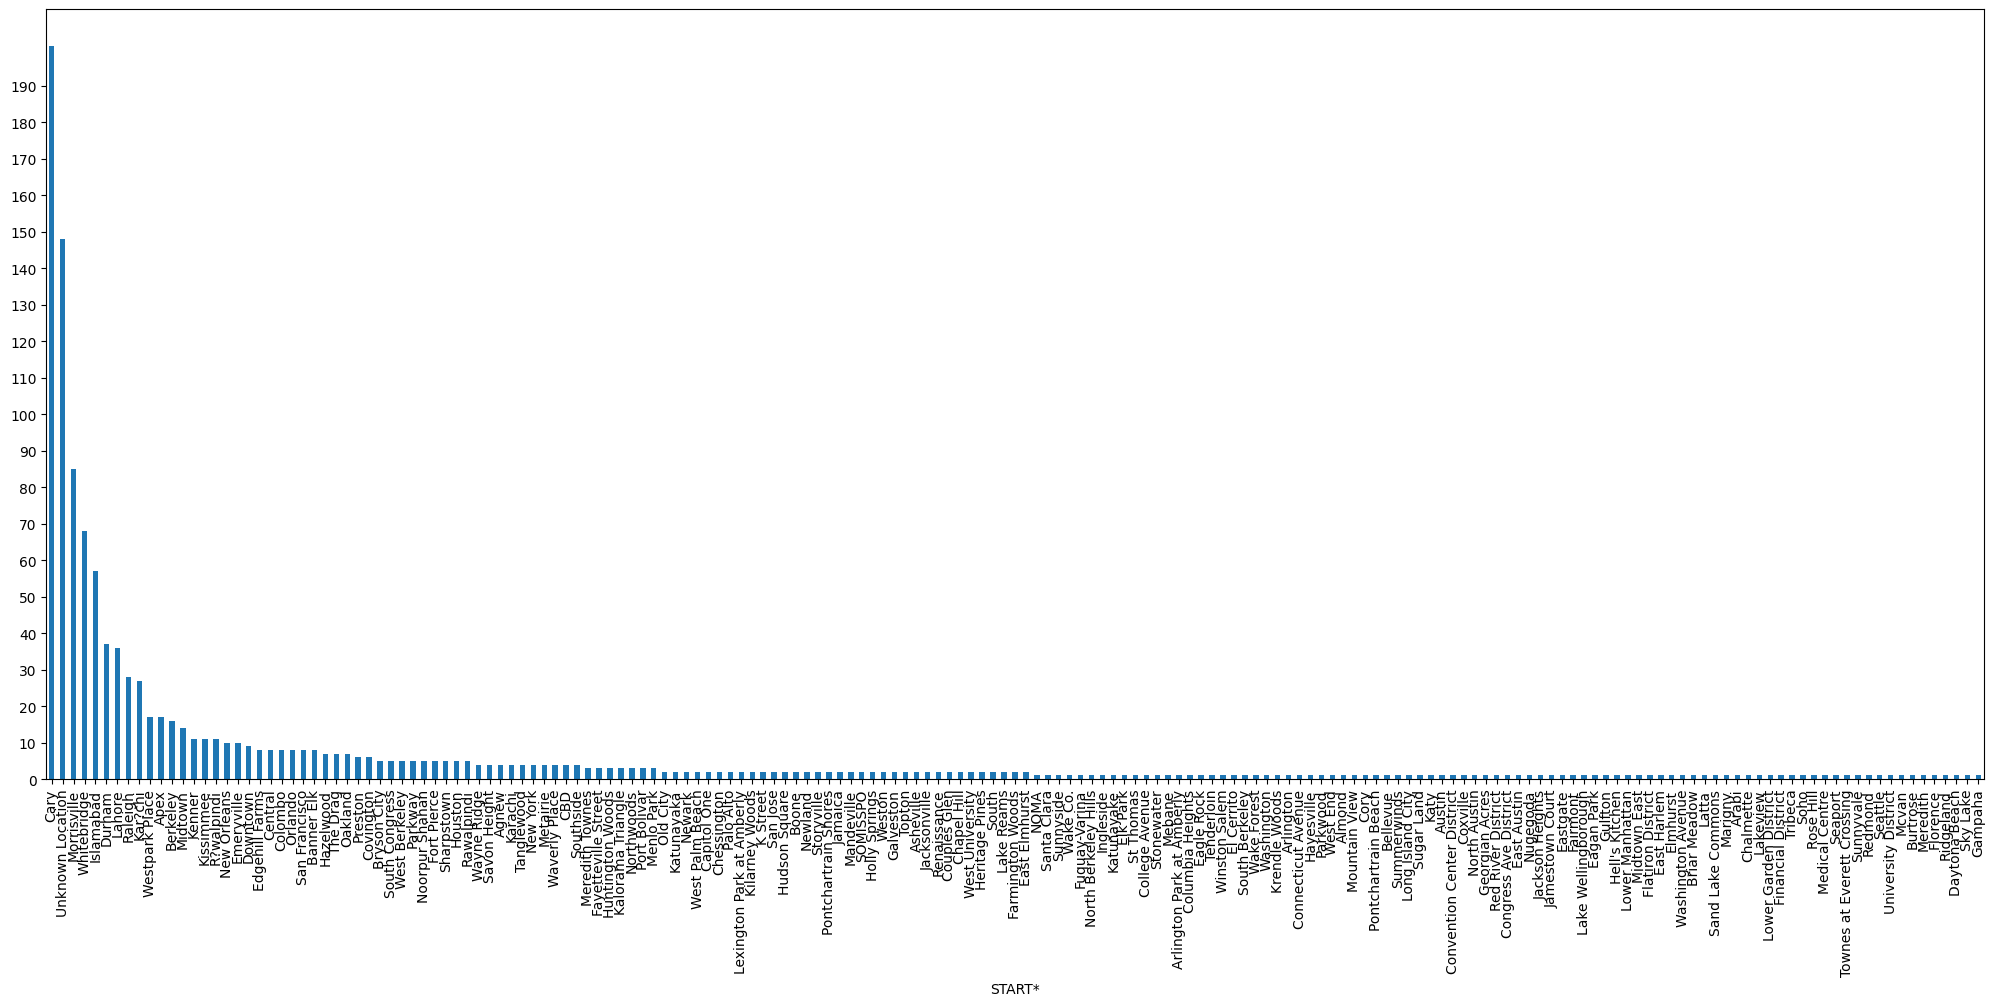

In [21]:
uber_data['START*'].value_counts().plot.bar(figsize=(25,10))
plt.yticks(list(range(0,200,10)))
plt.show()

<Axes: ylabel='Frequency'>

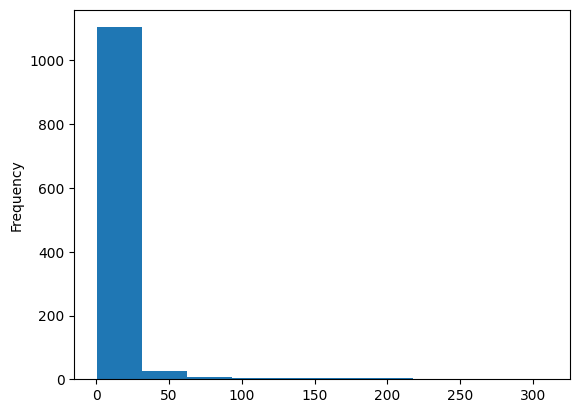

In [22]:
uber_data['MILES*'].plot.hist()

In [23]:
binwidth_np = np.linspace(0,250,25)
binwidth_list = list(range(0,250,10))

In [24]:
binwidth_np

array([  0.        ,  10.41666667,  20.83333333,  31.25      ,
        41.66666667,  52.08333333,  62.5       ,  72.91666667,
        83.33333333,  93.75      , 104.16666667, 114.58333333,
       125.        , 135.41666667, 145.83333333, 156.25      ,
       166.66666667, 177.08333333, 187.5       , 197.91666667,
       208.33333333, 218.75      , 229.16666667, 239.58333333,
       250.        ])

In [25]:
binwidth_list

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240]

Text(0.5, 1.0, 'MILES')

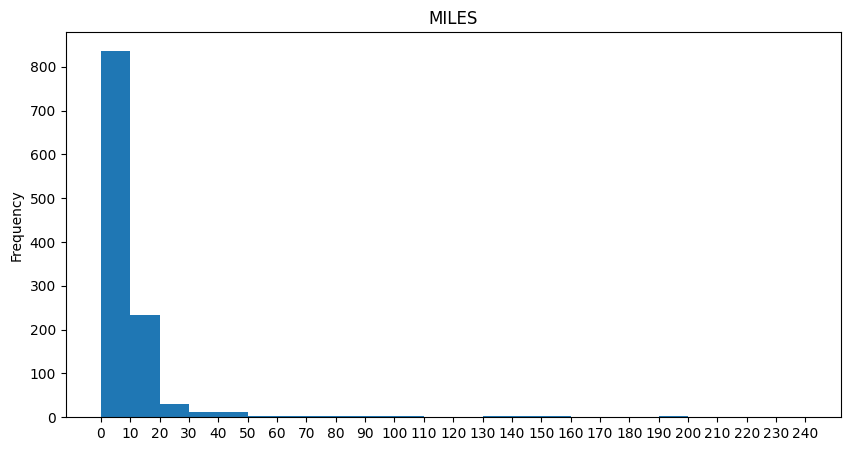

In [26]:
uber_data['MILES*'].plot.hist(bins=list(range(0,250,10)),figsize=(10,5))
plt.xticks(list(range(0,250,10)))
plt.title("MILES")

Text(0.5, 1.0, 'MILES')

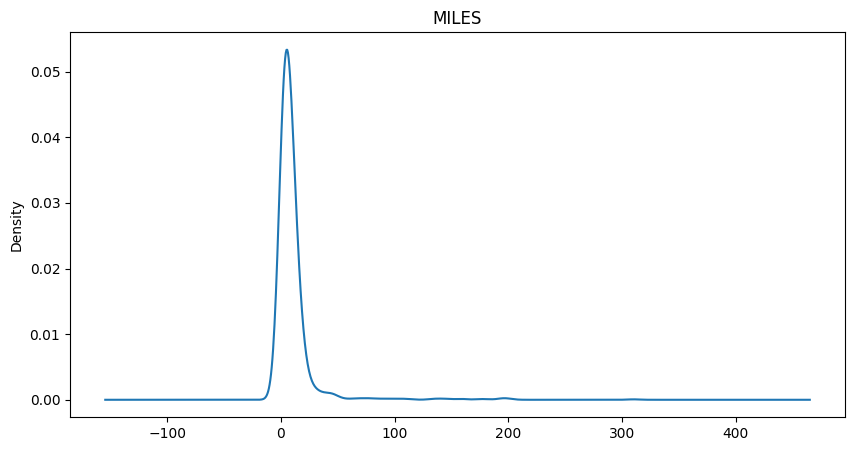

In [27]:
# binwidth = np.linspace(0,,121)
uber_data['MILES*'].plot.kde(figsize=(10,5))
# plt.xticks(list(range(0,250,10)))
plt.title("MILES")
#Kernel Density Estimation (KDE / Density Plot) --> Probs plots

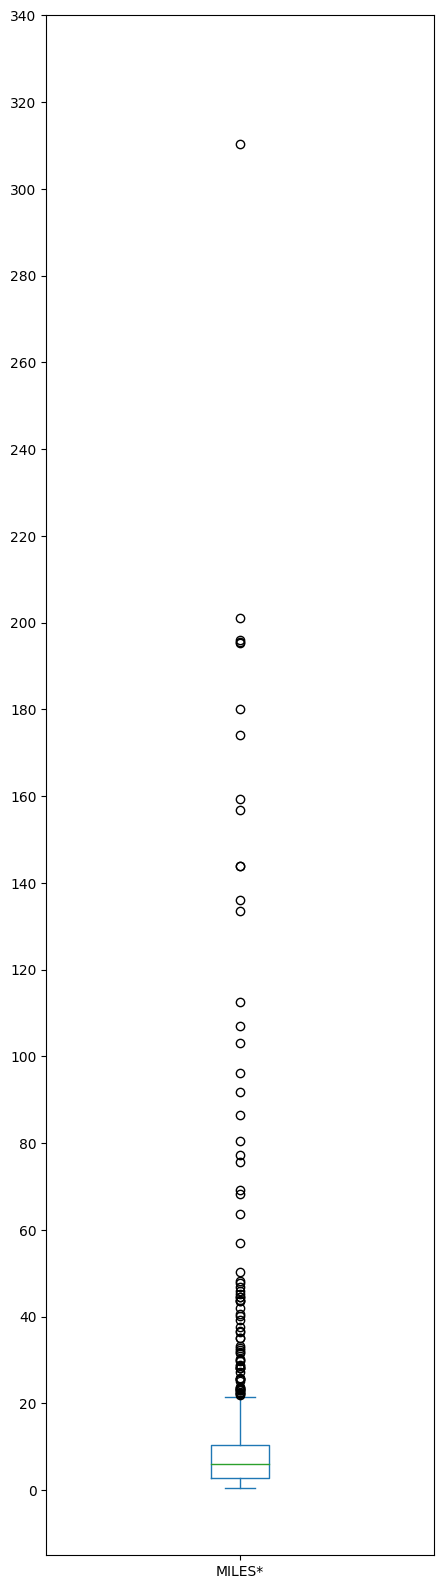

In [28]:
uber_data['MILES*'].plot.box(figsize=(5,20))
plt.yticks(list(range(0,350,20)))
plt.show()

In [31]:
type(uber_data['START_DATE*'][0])

str

In [32]:
pd.to_datetime(uber_data['START_DATE*'])

0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: START_DATE*, Length: 1155, dtype: datetime64[ns]

In [33]:
dts = []
for dt in uber_data['START_DATE*']:
    dts.append(dt.split(' '))

In [34]:
dts

[['1/1/2016', '21:11'],
 ['1/2/2016', '1:25'],
 ['1/2/2016', '20:25'],
 ['1/5/2016', '17:31'],
 ['1/6/2016', '14:42'],
 ['1/6/2016', '17:15'],
 ['1/6/2016', '17:30'],
 ['1/7/2016', '13:27'],
 ['1/10/2016', '8:05'],
 ['1/10/2016', '12:17'],
 ['1/10/2016', '15:08'],
 ['1/10/2016', '18:18'],
 ['1/10/2016', '19:12'],
 ['1/11/2016', '8:55'],
 ['1/11/2016', '11:56'],
 ['1/11/2016', '13:32'],
 ['1/11/2016', '14:30'],
 ['1/12/2016', '12:33'],
 ['1/12/2016', '12:53'],
 ['1/12/2016', '14:42'],
 ['1/12/2016', '15:13'],
 ['1/12/2016', '15:42'],
 ['1/12/2016', '16:02'],
 ['1/13/2016', '13:54'],
 ['1/13/2016', '15:00'],
 ['1/14/2016', '16:29'],
 ['1/14/2016', '21:39'],
 ['1/15/2016', '0:41'],
 ['1/15/2016', '11:43'],
 ['1/15/2016', '13:26'],
 ['1/18/2016', '14:55'],
 ['1/18/2016', '16:13'],
 ['1/19/2016', '9:09'],
 ['1/19/2016', '10:55'],
 ['1/20/2016', '10:36'],
 ['1/20/2016', '11:48'],
 ['1/20/2016', '13:25'],
 ['1/21/2016', '14:25'],
 ['1/21/2016', '14:43'],
 ['1/21/2016', '16:01'],
 ['1/26/2016'

In [37]:
uber_data['START_DATE*'].to_list()

['1/1/2016 21:11',
 '1/2/2016 1:25',
 '1/2/2016 20:25',
 '1/5/2016 17:31',
 '1/6/2016 14:42',
 '1/6/2016 17:15',
 '1/6/2016 17:30',
 '1/7/2016 13:27',
 '1/10/2016 8:05',
 '1/10/2016 12:17',
 '1/10/2016 15:08',
 '1/10/2016 18:18',
 '1/10/2016 19:12',
 '1/11/2016 8:55',
 '1/11/2016 11:56',
 '1/11/2016 13:32',
 '1/11/2016 14:30',
 '1/12/2016 12:33',
 '1/12/2016 12:53',
 '1/12/2016 14:42',
 '1/12/2016 15:13',
 '1/12/2016 15:42',
 '1/12/2016 16:02',
 '1/13/2016 13:54',
 '1/13/2016 15:00',
 '1/14/2016 16:29',
 '1/14/2016 21:39',
 '1/15/2016 0:41',
 '1/15/2016 11:43',
 '1/15/2016 13:26',
 '1/18/2016 14:55',
 '1/18/2016 16:13',
 '1/19/2016 9:09',
 '1/19/2016 10:55',
 '1/20/2016 10:36',
 '1/20/2016 11:48',
 '1/20/2016 13:25',
 '1/21/2016 14:25',
 '1/21/2016 14:43',
 '1/21/2016 16:01',
 '1/26/2016 10:41',
 '1/26/2016 12:33',
 '1/26/2016 16:24',
 '1/26/2016 17:17',
 '1/26/2016 17:27',
 '1/27/2016 9:24',
 '1/27/2016 10:19',
 '1/27/2016 12:34',
 '1/27/2016 14:05',
 '1/27/2016 14:46',
 '1/28/2016 12

In [38]:
date = []
time = []
for i in uber_data['START_DATE*'].to_list():
    date.append(i.split(' ')[0])
    time.append(i.split(' ')[1])
# Highly Inefficient

In [40]:
time

['21:11',
 '1:25',
 '20:25',
 '17:31',
 '14:42',
 '17:15',
 '17:30',
 '13:27',
 '8:05',
 '12:17',
 '15:08',
 '18:18',
 '19:12',
 '8:55',
 '11:56',
 '13:32',
 '14:30',
 '12:33',
 '12:53',
 '14:42',
 '15:13',
 '15:42',
 '16:02',
 '13:54',
 '15:00',
 '16:29',
 '21:39',
 '0:41',
 '11:43',
 '13:26',
 '14:55',
 '16:13',
 '9:09',
 '10:55',
 '10:36',
 '11:48',
 '13:25',
 '14:25',
 '14:43',
 '16:01',
 '10:41',
 '12:33',
 '16:24',
 '17:17',
 '17:27',
 '9:24',
 '10:19',
 '12:34',
 '14:05',
 '14:46',
 '12:28',
 '15:11',
 '16:21',
 '9:31',
 '10:56',
 '11:43',
 '13:24',
 '18:31',
 '21:21',
 '16:21',
 '18:09',
 '10:35',
 '12:10',
 '12:56',
 '13:04',
 '13:51',
 '14:38',
 '8:40',
 '9:37',
 '10:26',
 '15:59',
 '16:35',
 '18:04',
 '20:36',
 '11:47',
 '13:22',
 '16:20',
 '18:57',
 '19:28',
 '16:49',
 '18:03',
 '18:39',
 '20:22',
 '12:57',
 '14:00',
 '10:54',
 '11:43',
 '13:36',
 '13:58',
 '18:55',
 '20:24',
 '16:28',
 '17:49',
 '18:24',
 '20:36',
 '8:21',
 '10:45',
 '11:14',
 '13:02',
 '14:49',
 '15:33',


In [151]:
list(map(lambda x:x[0],date_time)) # Ineffecient

['1/1/2016',
 '1/2/2016',
 '1/2/2016',
 '1/5/2016',
 '1/6/2016',
 '1/6/2016',
 '1/6/2016',
 '1/7/2016',
 '1/10/2016',
 '1/10/2016',
 '1/10/2016',
 '1/10/2016',
 '1/10/2016',
 '1/11/2016',
 '1/11/2016',
 '1/11/2016',
 '1/11/2016',
 '1/12/2016',
 '1/12/2016',
 '1/12/2016',
 '1/12/2016',
 '1/12/2016',
 '1/12/2016',
 '1/13/2016',
 '1/13/2016',
 '1/14/2016',
 '1/14/2016',
 '1/15/2016',
 '1/15/2016',
 '1/15/2016',
 '1/18/2016',
 '1/18/2016',
 '1/19/2016',
 '1/19/2016',
 '1/20/2016',
 '1/20/2016',
 '1/20/2016',
 '1/21/2016',
 '1/21/2016',
 '1/21/2016',
 '1/26/2016',
 '1/26/2016',
 '1/26/2016',
 '1/26/2016',
 '1/26/2016',
 '1/27/2016',
 '1/27/2016',
 '1/27/2016',
 '1/27/2016',
 '1/27/2016',
 '1/28/2016',
 '1/28/2016',
 '1/28/2016',
 '1/29/2016',
 '1/29/2016',
 '1/29/2016',
 '1/29/2016',
 '1/29/2016',
 '1/29/2016',
 '1/30/2016',
 '1/30/2016',
 '2/1/2016',
 '2/1/2016',
 '2/1/2016',
 '2/2/2016',
 '2/2/2016',
 '2/2/2016',
 '2/4/2016',
 '2/4/2016',
 '2/4/2016',
 '2/4/2016',
 '2/4/2016',
 '2/4/2016'

In [42]:
date_time = uber_data['START_DATE*'].str.split(' ') # Parallel execution or efficient
date = date_time.apply(lambda x:x[0]) # Efficient
time = date_time.apply(lambda x:x[1])

In [43]:
date

0         1/1/2016
1         1/2/2016
2         1/2/2016
3         1/5/2016
4         1/6/2016
           ...    
1150    12/31/2016
1151    12/31/2016
1152    12/31/2016
1153    12/31/2016
1154    12/31/2016
Name: START_DATE*, Length: 1155, dtype: object

In [44]:
time

0       21:11
1        1:25
2       20:25
3       17:31
4       14:42
        ...  
1150     1:07
1151    13:24
1152    15:03
1153    21:32
1154    22:08
Name: START_DATE*, Length: 1155, dtype: object

In [45]:
uber_data["ONLY_START_DATE"] = date
uber_data["ONLY_TIME"] = time

In [47]:
uber_data['ONLY_START_DATE'].value_counts()

ONLY_START_DATE
12/29/2016    13
6/27/2016     11
12/19/2016    11
2/21/2016     11
3/4/2016      10
              ..
10/11/2016     1
7/28/2016      1
3/30/2016      1
4/3/2016       1
1/1/2016       1
Name: count, Length: 294, dtype: int64

<Axes: xlabel='ONLY_START_DATE'>

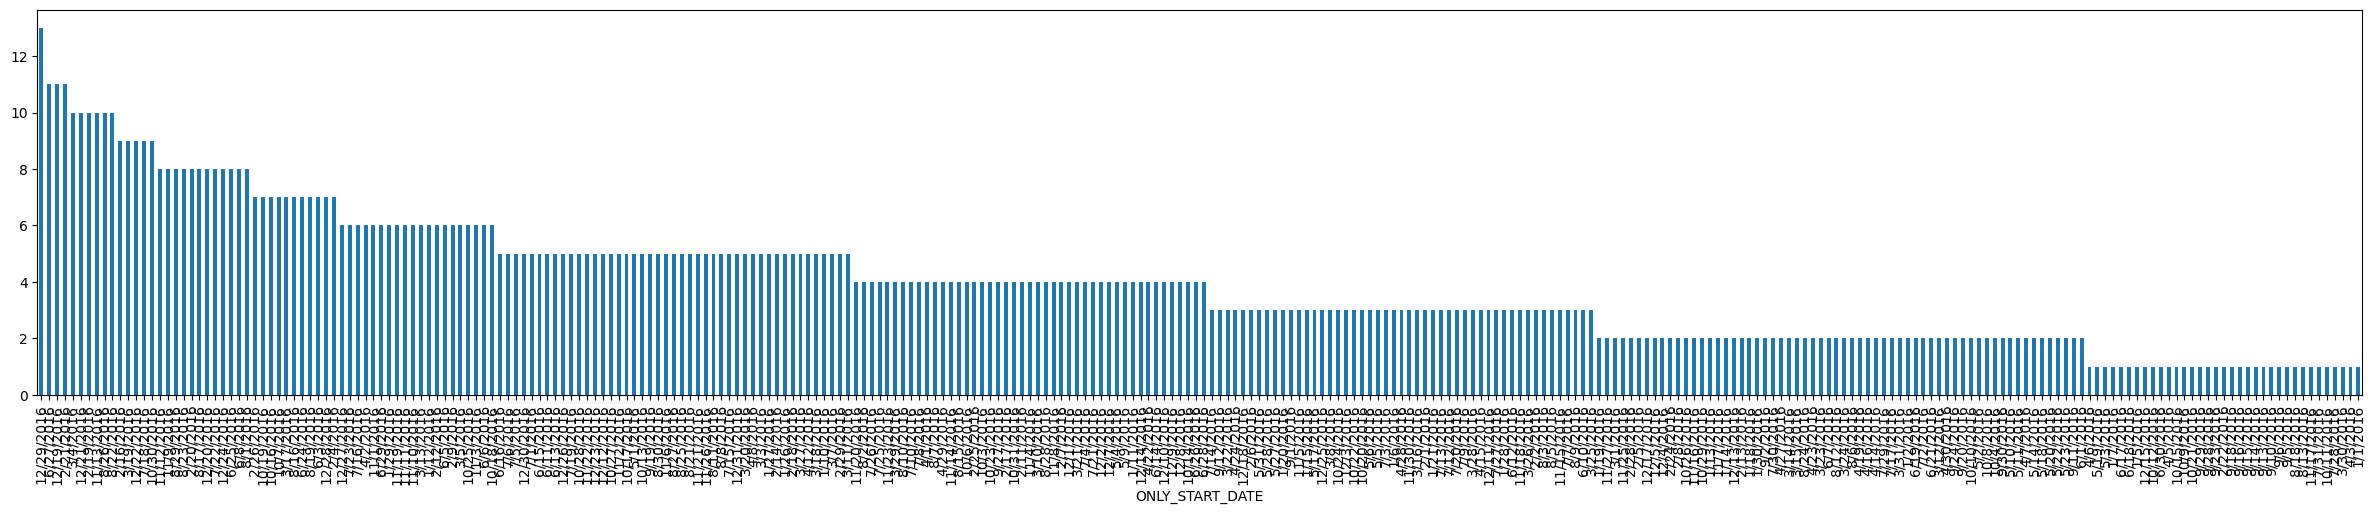

In [50]:
uber_data['ONLY_START_DATE'].value_counts().plot.bar(figsize=(30,5))

<Axes: ylabel='Frequency'>

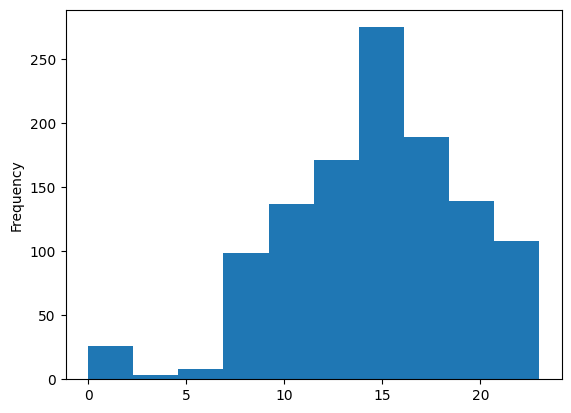

In [59]:
uber_data['ONLY_TIME'].apply(lambda x:int(str(x).split(':')[0])).plot.hist()